In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa

from glob import glob

In [64]:
data_folder = '../data/golos/farfield/'

df = pd.read_json(data_folder + 'manifest.jsonl', lines=True)
df

,id,audio_filepath,text,duration
0,58b586f67f5e634506e215df5996b82e,files/58b586f67f5e634506e215df5996b82e.wav,джой хватит,1.696625
1,26093ef7a8c5ec6a3c586a6a929c1bd3,files/26093ef7a8c5ec6a3c586a6a929c1bd3.wav,салют вызов светлане васильевне николенко,3.172063
2,b42d13ab3dc159fac39a1120e8011f66,files/b42d13ab3dc159fac39a1120e8011f66.wav,салют хватит,1.522687
3,7e55843e745a239b35212e2caba77239,files/7e55843e745a239b35212e2caba77239.wav,джой звонок юрию ивановичу царькову,3.064062
4,a0c621e2819a3747e42d05940aab0446,files/a0c621e2819a3747e42d05940aab0446.wav,джой выйти из сценария,2.314750
...,...,...,...,...
1911,55c59dedf6bea76648dc52f024f2bf39,files/55c59dedf6bea76648dc52f024f2bf39.wav,афина чем платят у жителей боснии и герцеговины,5.404937
1912,a33d901240157dd37643f39794b092e3,files/a33d901240157dd37643f39794b092e3.wav,джой доведи меня до банкомата,3.027563
1913,8263130fcaefd4b98146a041410827ad,files/8263130fcaefd4b98146a041410827ad.wav,сбер я не вижу баланс кредитной карты,3.302000
1914,d5c35e7f86962362b9e791009cb70cd2,files/d5c35e7f86962362b9e791009cb70cd2.wav,афина расскажи про германа оскаровича,3.977437


In [65]:
df_today = df[(df['text'].apply(lambda x: 'сегодня' in x))]
df_today

,id,audio_filepath,text,duration
362,2b421e7bb7fa3f7131599da852c4cb0a,files/2b421e7bb7fa3f7131599da852c4cb0a.wav,афина пойдет ли снег сегодня,3.090187
381,3080175c0263f446ce72545b1d8783e1,files/3080175c0263f446ce72545b1d8783e1.wav,афина сколько стоит на сегодняшний день америк...,5.139250
451,0c25028aa2164b1342ccab953b8c5b06,files/0c25028aa2164b1342ccab953b8c5b06.wav,афина лучший курс доллара в банках гвинеи на с...,4.201437
505,d93f81f849b35bb1cd1c6cc02a71e0f2,files/d93f81f849b35bb1cd1c6cc02a71e0f2.wav,афина как твои дела на сегодня,3.729125
533,bf6b5301fcc27d8faa173908f1ba6d6e,files/bf6b5301fcc27d8faa173908f1ba6d6e.wav,салют какой курс доллара на сегодня,3.667500
534,05cdd91ff20a59b2056067b64805e812,files/05cdd91ff20a59b2056067b64805e812.wav,сбер какое сегодня атмосферное давление повыше...,8.113625
549,a6059e46536c60d1cc3ce407e7d6f8f8,files/a6059e46536c60d1cc3ce407e7d6f8f8.wav,афина как твои дела на сегодня,3.617188
939,00a5c37ffb884e4ce76ef26d5059a138,files/00a5c37ffb884e4ce76ef26d5059a138.wav,афина я не хочу чтобы сегодня звонил будильник,3.687750
967,84ebe6734a1eedfdf9a5a601d2b485f3,files/84ebe6734a1eedfdf9a5a601d2b485f3.wav,афина курс центрального банка валюты на сегодн...,4.314312
1677,98b44d7244bf7ea44eb725363ebd33a8,files/98b44d7244bf7ea44eb725363ebd33a8.wav,сбер какой курс доллара сша на сегодня,2.861375


In [66]:
def show_spec(file_path, start=0, end=-1):
    y, sr = librosa.load(file_path)
    start = int(start * sr)
    end = -1 if (end == -1) else int(end * sr)
    y = y[start:end]
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    fig, ax = plt.subplots(figsize=(10, 5))
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
    plt.show()
    ipd.display(ipd.Audio(data=y, rate=sr))

In [26]:
df_today.iloc[0, 1]

'files/9015c5ffca422a3a6f76211024e9aa5e.wav'

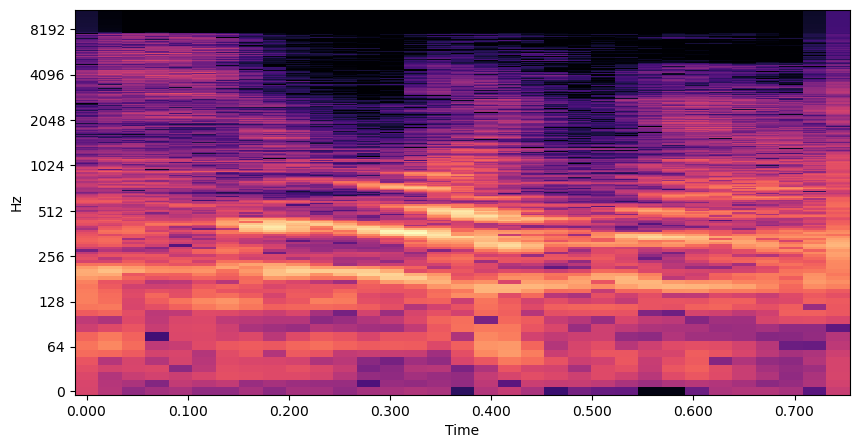

In [80]:
# audio_files = glob('..\\data\\golos\\crowd\\files\\*.wav')
# file_path = audio_files[228]
file_path = data_folder + df_today.iloc[3, 1]

show_spec(file_path,2.75, 3.5);

In [11]:
file_path

'..\\data\\golos\\crowd\\files\\0579518f5e7ec889bfe3d7b00fd7bb91.wav'